In [1]:
import stumpy
import matplotlib.dates as dates
from matplotlib.patches import Rectangle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import prep
#from tsfresh.utilities.dataframe_functions import roll_time_series

In [4]:
cars = pd.read_csv('total_vehicle_sales.csv')

In [5]:
cars.head()

,DATE,TOTALSA
0,1976-01-01,12.814
1,1976-02-01,13.340
2,1976-03-01,13.378
3,1976-04-01,13.223
4,1976-05-01,12.962


In [6]:
cars.shape

(560, 2)

In [7]:
cars.dtypes

DATE        object
TOTALSA    float64
dtype: object

In [8]:
# Reassign the sale_date column to be a datetime type
cars.DATE = pd.to_datetime(cars.DATE)

# Sort rows by the date and then set the index as that date
cars = cars.set_index("DATE").sort_index()


In [8]:
cars.dtypes

TOTALSA    float64
dtype: object

In [9]:
m = 30
mp = stumpy.stump(cars['TOTALSA'], m)

In [10]:
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")

The motif is located at index 421


In [16]:
nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 449


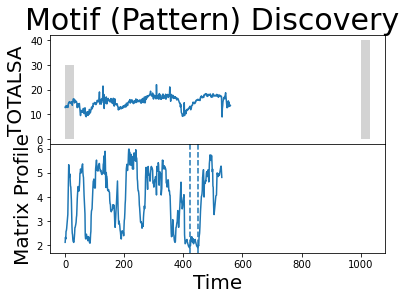

In [17]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')
axs[0].plot(cars['TOTALSA'].values)
axs[0].set_ylabel('TOTALSA', fontsize='20')
rect = Rectangle((0, 0), m, 30, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((1000, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=421, linestyle="dashed")
axs[1].axvline(x=449, linestyle="dashed")
axs[1].plot(mp[:, 0])

In [18]:
mp[:, 0].min()

1.8909397561311336

In [ ]:
print(f"The discord is located at index {discord_idx}")


In [ ]:
train_size = .80
n = cars.shape[0]
validate_s = .20
test_start_index = round(train_size * n)

train = cars[:test_start_index] # everything up (not including) to the test_start_index
validate = cars[:test_start_index]
test = cars[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

AttributeError: 'DataFrame' object has no attribute 'temp'

<AxesSubplot:xlabel='DATE'>

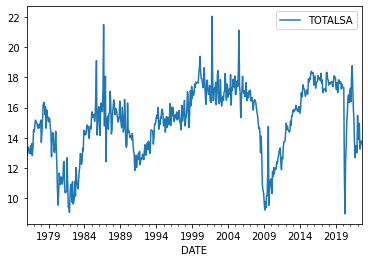

In [ ]:
#by_date = df.groupby(['sale_date']).sale_amount.sum().reset_index()
cars.plot(x='DATE', y='TOTALSA')

In [ ]:
# def rolling_forecast_origin (train, min_train, horizon):

#     for i in range(len(train) - min_train - horizon + 1):
#         split_train = train[:min_train+1]
#         split_val = train[min_train+1:min_train + 1 + horizon]
#         yield split_train, split_val


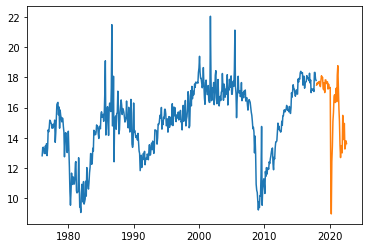

In [9]:
train_size = .90
n = cars.shape[0]
test_start_index = round(train_size * n)

train = cars[:test_start_index] # everything up (not including) to the test_start_index
test = cars[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.TOTALSA)
plt.plot(test.index, test.TOTALSA)

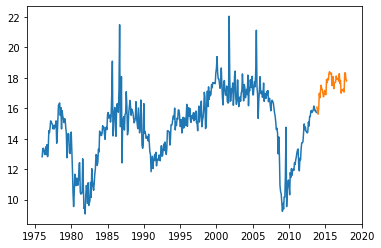

In [10]:
train_size = .90
n = train.shape[0]
validate_start_index = round(train_size * n)

train = cars[:validate_start_index] # everything up (not including) to the test_start_index
validate = cars[validate_start_index:test_start_index ] # everything from the test_start_index to the end

plt.plot(train.index, train.TOTALSA)
plt.plot(validate.index, validate.TOTALSA)

In [11]:
validate.shape

(50, 1)

In [12]:
test.shape

(56, 1)

In [13]:
train.shape

(454, 1)

In [9]:
train, validate, test = prep.time_series_split(cars)

In [10]:
train.shape, validate.shape, test.shape

((454, 1), (50, 1), (56, 1))

In [14]:
y = train.TOTALSA
y.head()


DATE
1976-01-01    12.814
1976-02-01    13.340
1976-03-01    13.378
1976-04-01    13.223
1976-05-01    12.962
Name: TOTALSA, dtype: float64

<AxesSubplot:ylabel='Frequency'>

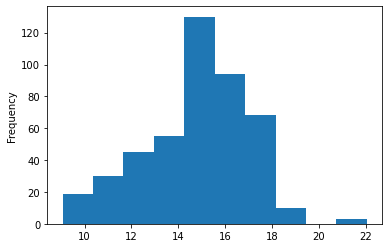

In [15]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Sales')]

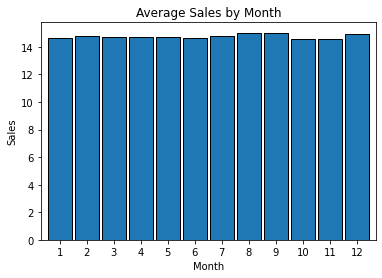

In [16]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Sales')


<AxesSubplot:xlabel='DATE'>

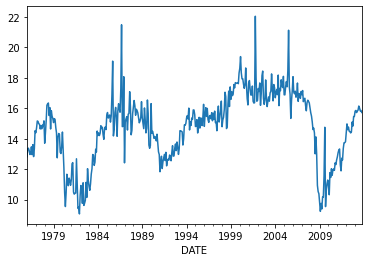

In [17]:
y.plot()


<AxesSubplot:title={'center':'6 month average'}, xlabel='DATE'>

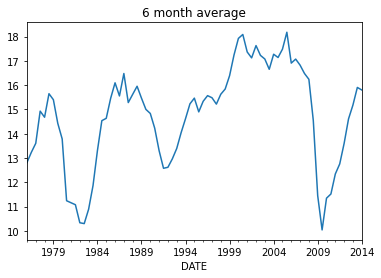

In [18]:
y.resample('6M').mean().plot(title='6 month average')


<AxesSubplot:title={'center':'3 month average'}, xlabel='DATE'>

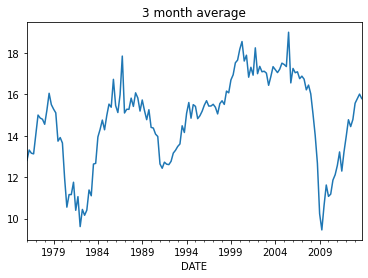

In [19]:
y.resample('3M').mean().plot(title='3 month average')


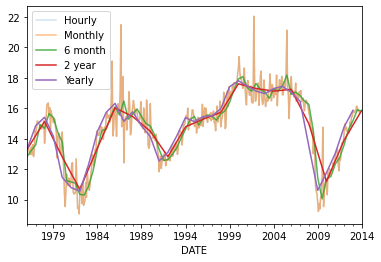

In [20]:
y.plot(alpha=.2, label='Hourly')
y.resample('M').mean().plot(alpha=.5, label='Monthly')
y.resample('6M').mean().plot(alpha=.8, label='6 month')
y.resample('2Y').mean().plot(label='2 year')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()


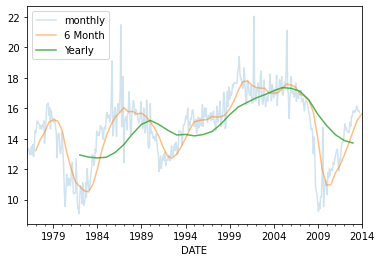

In [21]:
y.plot(alpha=.2, label='monthly')
y.resample('6M').mean().rolling(3).mean().plot(alpha=.5, label='6 Month')
y.resample('Y').mean().rolling(7).mean().plot(alpha=.8, label='Yearly')
plt.legend()


In [3]:
new = pd.read_csv('new vehicle sales.csv')

In [4]:
new = new.T

In [5]:
new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Table 1-15: Annual U.S. Motor Vehicle Production and Domestic Sales (Thousands of units),NaN,"Production, total",Passenger cars,Commercial vehiclesa,"Domestic sales, totalb",Passenger cars,Commercial vehiclesa,KEY: N = data do not exist; R = revised.,NaN,"a Includes trucks under 10,000 pounds GVWR, su...",b Domestic Sales includes U.S. sales of cars p...,NaN,SOURCE,"Wards Intelligence, Wards Automotive Yearbook ..."
Unnamed: 1,1960,"7,894","6,696","1,198",N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 2,1965,"11,114","9,329","1,785","10,302","8,763","1,539",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,1970,"8,263","6,546","1,717","8,849","7,112","1,737",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,1975,"8,965","6,706","2,260","9,298","6,945","2,353",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 5,1980,"8,011","6,372","1,638","8,594","6,580","2,015",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,1985,"11,638","8,186","3,452","12,110","8,205","3,905",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,1990,"9,767","6,078","3,690","11,134","6,917","4,217",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,1991,"8,790","5,440","3,350","9,976","6,162","3,814",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,1992,"9,691","5,667","4,025","10,768","6,286","4,482",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
new = new.reset_index()

In [7]:
new.T[0]

index    Table 1-15:  Annual U.S. Motor Vehicle Product...
0                                                      NaN
1                                        Production, total
2                                           Passenger cars
3                                     Commercial vehiclesa
4                                   Domestic sales, totalb
5                                           Passenger cars
6                                     Commercial vehiclesa
7                 KEY: N = data do not exist; R = revised.
8                                                      NaN
9        a Includes trucks under 10,000 pounds GVWR, su...
10       b Domestic Sales includes U.S. sales of cars p...
11                                                     NaN
12                                                  SOURCE
13       Wards Intelligence, Wards Automotive Yearbook ...
Name: 0, dtype: object

In [8]:
new.columns = new.T[0].to_list()

In [9]:
new.columns

Index([                                                                                                  'Table 1-15:  Annual U.S. Motor Vehicle Production and Domestic Sales (Thousands of units)',
                                                                                                                                                                                                 nan,
                                                                                                                                                                                 'Production, total',
                                                                                                                                                                                    'Passenger cars',
                                                                                                                                                                              'Commercial vehiclesa',
          

In [10]:
new = new.drop(index=0)

In [11]:
a = new.columns.to_numpy()
#pandas below
#a = dftrash.columns.to_numpy()
#a[0] = 'Total production'
a[1] = 'Year'
print (a)


['Table 1-15:  Annual U.S. Motor Vehicle Production and Domestic Sales (Thousands of units)'
 'Year' 'Production, total' 'Passenger cars' 'Commercial vehiclesa'
 'Domestic sales, totalb' 'Passenger cars' 'Commercial vehiclesa'
 'KEY: N = data do not exist; R = revised.' nan
 'a Includes trucks under 10,000 pounds GVWR, such as compact and conventional pickups, sport utility vehicles, minivans and vans, and trucks and buses over 10,000 pounds GVWR. '
 "b Domestic Sales includes U.S. sales of cars produced in U.S., Canada, and Mexico. Sales from previous year's inventory can also contribute to sales numbers exceeding production."
 nan 'SOURCE'
 'Wards Intelligence, Wards Automotive Yearbook (Southfield, MI: Annual Issues), North America Car & Truck Production and U.S. Vehicle Sales by Year, and similar tables in earlier editions.']


In [12]:
new.columns

Index([                                                                                                  'Table 1-15:  Annual U.S. Motor Vehicle Production and Domestic Sales (Thousands of units)',
                                                                                                                                                                                              'Year',
                                                                                                                                                                                 'Production, total',
                                                                                                                                                                                    'Passenger cars',
                                                                                                                                                                              'Commercial vehiclesa',
          

In [13]:
trimmed_new = new[['Year', 'Production, total']]

In [15]:
trimmed_new

,Year,"Production, total"
1,1960,"7,894"
2,1965,"11,114"
3,1970,"8,263"
4,1975,"8,965"
5,1980,"8,011"
6,1985,"11,638"
7,1990,"9,767"
8,1991,"8,790"
9,1992,"9,691"
10,1993,"10,855"


In [14]:
trimmed_new = trimmed_new.drop(index=0)

KeyError: '[0] not found in axis'

In [16]:
trimmed_new

,Year,"Production, total"
1,1960,"7,894"
2,1965,"11,114"
3,1970,"8,263"
4,1975,"8,965"
5,1980,"8,011"
6,1985,"11,638"
7,1990,"9,767"
8,1991,"8,790"
9,1992,"9,691"
10,1993,"10,855"


In [17]:
trimmed_new.dtypes

Year                 object
Production, total    object
dtype: object

In [18]:
# Reassign the sale_date column to be a datetime type
trimmed_new.Year = pd.to_datetime(trimmed_new.Year)

# Sort rows by the date and then set the index as that date
#cars = cars.set_index("DATE").sort_index()

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_58435/2815640176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_new.Year = pd.to_datetime(trimmed_new.Year)


In [19]:
trimmed_new

,Year,"Production, total"
1,1960-01-01,"7,894"
2,1965-01-01,"11,114"
3,1970-01-01,"8,263"
4,1975-01-01,"8,965"
5,1980-01-01,"8,011"
6,1985-01-01,"11,638"
7,1990-01-01,"9,767"
8,1991-01-01,"8,790"
9,1992-01-01,"9,691"
10,1993-01-01,"10,855"


In [20]:
trimmed_new['total_production'] = trimmed_new['Production, total']

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_58435/3649193450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_new['total_production'] = trimmed_new['Production, total']


In [21]:
trimmed_new.columns

Index(['Year', 'Production, total', 'total_production'], dtype='object')

In [22]:
trimmed_new.drop(columns=['Production, total'], inplace=True)

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_58435/165254666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_new.drop(columns=['Production, total'], inplace=True)


In [23]:
trimmed_new['total_production'] = trimmed_new.total_production.str.replace(",","")

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_58435/3948503158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_new['total_production'] = trimmed_new.total_production.str.replace(",","")


In [24]:
trimmed_new['total_production'] = trimmed_new.total_production.str.replace("(R)","")

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_58435/1838801470.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  trimmed_new['total_production'] = trimmed_new.total_production.str.replace("(R)","")
/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_58435/1838801470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_new['total_production'] = trimmed_new.total_production.str.replace("(R)","")


In [25]:
trimmed_new['total_production'] = trimmed_new.total_production.str.replace("(","").str.replace(')', '')

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_58435/3681666278.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  trimmed_new['total_production'] = trimmed_new.total_production.str.replace("(","").str.replace(')', '')
/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_58435/3681666278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_new['total_production'] = trimmed_new.total_production.str.replace("(","").str.replace(')', '')


In [26]:
trimmed_new

,Year,total_production
1,1960-01-01,7894
2,1965-01-01,11114
3,1970-01-01,8263
4,1975-01-01,8965
5,1980-01-01,8011
6,1985-01-01,11638
7,1990-01-01,9767
8,1991-01-01,8790
9,1992-01-01,9691
10,1993-01-01,10855


In [27]:
trimmed_new['total_production'] = trimmed_new.total_production.astype(int)

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_58435/2839632905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_new['total_production'] = trimmed_new.total_production.astype(int)


In [28]:
trimmed_new.dtypes

Year                datetime64[ns]
total_production             int64
dtype: object

In [29]:
trimmed_new

,Year,total_production
1,1960-01-01,7894
2,1965-01-01,11114
3,1970-01-01,8263
4,1975-01-01,8965
5,1980-01-01,8011
6,1985-01-01,11638
7,1990-01-01,9767
8,1991-01-01,8790
9,1992-01-01,9691
10,1993-01-01,10855


In [30]:
# Sort rows by the date and then set the index as that date
trimmed_new = trimmed_new.set_index("Year").sort_index()

In [40]:
trimmed_new.to_csv('new_car_sales.csv')

In [3]:
df = pd.read_csv('new_car_sales.csv')

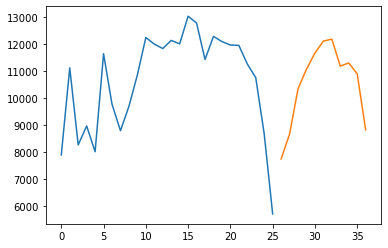

In [5]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.total_production)
plt.plot(test.index, test.total_production)

In [4]:
train, test = prep.train_test_split(df)

In [5]:
train.shape, test.shape

((26, 2), (11, 2))

In [7]:
y = train.total_production
y.head()


0     7894
1    11114
2     8263
3     8965
4     8011
Name: total_production, dtype: int64

<AxesSubplot:ylabel='Frequency'>

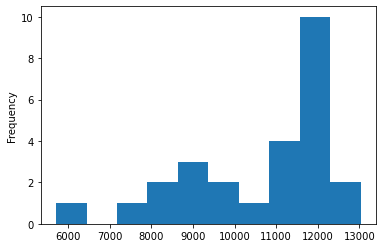

In [8]:
y.plot.hist()

<AxesSubplot:>

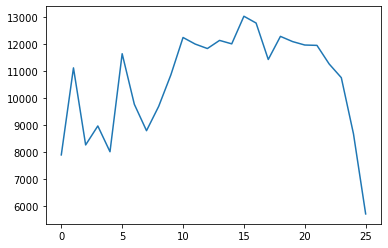

In [9]:
y.plot()

In [13]:
train.set_index("Year").sort_index()

,total_production
Year,
1960-01-01,7894
1965-01-01,11114
1970-01-01,8263
1975-01-01,8965
1980-01-01,8011
1985-01-01,11638
1990-01-01,9767
1991-01-01,8790
1992-01-01,9691


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

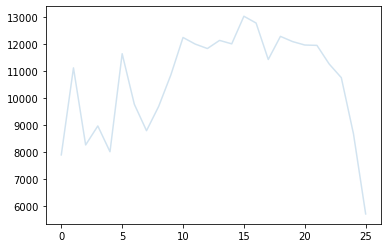

In [15]:
y.plot(alpha=.2, label='Yearly')
#y.resample('M').mean().plot(alpha=.5, label='Monthly')
y.resample('6M').mean().plot(alpha=.8, label='6 month')
#y.resample('2Y').mean().plot(label='2 year')
#y.resample('Y').mean().plot(label='Yearly')
plt.legend()

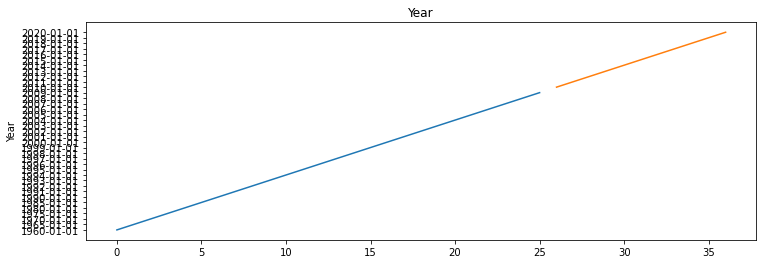

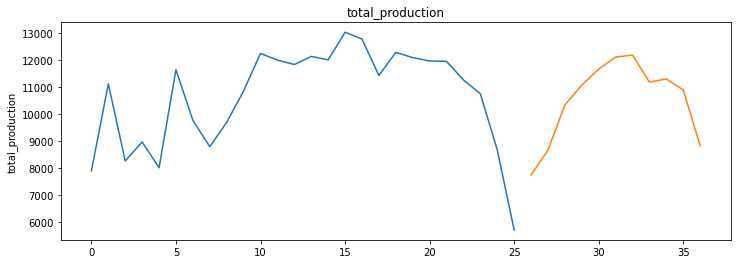

In [17]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    #plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [38]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.3/577.3 kB 1.9 MB/s eta 0:00:0000:0100:01


In [16]:
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose


In [13]:
train.Year = pd.to_datetime(train.Year)

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_77100/3519277000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Year = pd.to_datetime(train.Year)


In [17]:
stepwise_fit = auto_arima(train['total_production'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=243.974, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=240.475, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=243.199, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=242.020, Time=0.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=241.740, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=240.974, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=242.445, Time=0.01 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=242.416, Time=0.02 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=240.845, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.563 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   26
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -119.237
Date:                            Thu, 15 Sep 2022   AIC                            240.475
Time:                                    14:23:42   BIC                            241.040
Sample:                                         0   HQIC                           240.359
                                             - 26                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.206e+06   2.28e+06      2.280      0.023     7.3e+05    9.68e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.31   Prob(JB):                         0.88
Heteroskedasticity (H):               1.13   Skew:                            -0.04
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['total_production'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59337D+00    |proj g|=  1.34289D-01

At iterate    5    f=  4.53865D+00    |proj g|=  4.47143D-03

At iterate   10    f=  4.53834D+00    |proj g|=  7.72382D-05

At iterate   15    f=  4.53834D+00    |proj g|=  6.95241D-04

At iterate   20    f=  4.53812D+00    |proj g|=  9.13704D-03

At iterate   25    f=  4.50233D+00    |proj g|=  9.07718D-02

At iterate   30    f=  4.47438D+00    |proj g|=  1.25920D-02

At iterate   35    f=  4.47261D+00    |proj g|=  1.55232D-03

At iterate   40    f=  4.47258D+00    |proj g|=  1.01180D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   total_production   No. Observations:                   26
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -116.287
Date:                            Thu, 15 Sep 2022   AIC                            242.574
Time:                                    14:26:32   BIC                            245.399
Sample:                                         0   HQIC                           241.994
                                             - 26                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0290      0.284      0.102      0.919      -0.528       0.586
ar.S.L12      -0.4293      2.158     -0.199      0.842      -4.659       3.801
ar.S.L24      -0.9144      1.030     -0.888      0.375      -2.933       1.105
ma.S.L12      -0.2274     15.608     -0.015      0.988     -30.818      30.363
sigma2      6.375e+05   6.64e-05    9.6e+09      0.000    6.38e+05    6.38e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.23   Prob(JB):                         0.82
Heteroskedasticity (H):               1.73   Skew:                            -0.33
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.56e+26. Standard errors may be unstable.
"""

<AxesSubplot:>

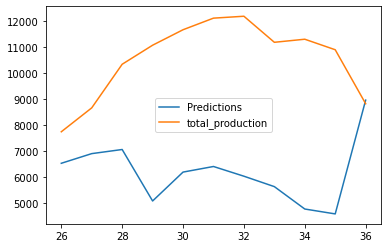

In [20]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['total_production'].plot(legend = True)